In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


---
# import library
---


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
BASE_PATH = "/content/drive/MyDrive/lung_cancer"

---
# Preprocessing and Split DataSet
---


In [ ]:
BATCH_SIZE = 64
IMAGE_SIZE = 300

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(

    os.path.join(BASE_PATH, "lung cancer dataset"),
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),

    batch_size=BATCH_SIZE
 
)


Found 1097 files belonging to 3 classes.


In [ ]:
class_names = dataset.class_names

print(class_names)


['Bengin cases', 'Malignant cases', 'Normal cases']


In [ ]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(image_batch[1])


(64, 300, 300, 3)
tf.Tensor(
[[[38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]
  ...
  [38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]]

 [[38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]
  ...
  [38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]]

 [[38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]
  ...
  [38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]]

 ...

 [[38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]
  ...
  [38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]]

 [[38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]
  ...
  [38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]]

 [[38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]
  ...
  [38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]]], shape=(300, 300, 3), dtype=float32)


---
## Split DataSet into Training , Testing and Validation
---




In [ ]:


def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):

  assert (train_split + val_split + test_split) == 1

  ds_size = len(ds)

  if shuffle:
    ds = ds.shuffle(shuffle_size, seed=12)

  train_size = int(train_split * ds_size)
  val_size = int(val_split * ds_size)
  test_size = int(test_split * ds_size)

  train_ds = ds.take(train_size)
  val_ds = ds.skip(train_size).take(val_size)
  test_ds = ds.skip(train_size).skip(val_size)

  train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
  val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
  test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

  return train_ds, val_ds, test_ds


In [ ]:


train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset) 

In [ ]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),

    layers.experimental.preprocessing.Rescaling(1./255),
])



In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])


# Building Model

In [ ]:
from tensorflow.keras import models

input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 9

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])


model.build(input_shape=input_shape)

In [ ]:
model.compile(
    optimizer='adam',
       loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']

)

In [ ]:
history = model.fit(
   train_ds, 
   batch_size=BATCH_SIZE,  
   validation_data=val_ds,  
   verbose=1,  
   epochs=50  
)

Epoch 1/50
14/14 [==============================] - 85s 1s/step - loss: 1.4560 - accuracy: 0.4471 - val_loss: 1.0037 - val_accuracy: 0.5938
Epoch 2/50
14/14 [==============================] - 2s 139ms/step - loss: 1.0124 - accuracy: 0.4923 - val_loss: 0.8718 - val_accuracy: 0.5938
Epoch 3/50
14/14 [==============================] - 2s 138ms/step - loss: 0.9573 - accuracy: 0.5125 - val_loss: 0.8669 - val_accuracy: 0.6719
Epoch 4/50
14/14 [==============================] - 2s 137ms/step - loss: 0.8971 - accuracy: 0.5755 - val_loss: 0.7889 - val_accuracy: 0.7969
Epoch 5/50
14/14 [==============================] - 2s 141ms/step - loss: 0.8454 - accuracy: 0.6266 - val_loss: 0.7380 - val_accuracy: 0.5938
Epoch 6/50
14/14 [==============================] - 2s 140ms/step - loss: 0.8027 - accuracy: 0.6314 - val_loss: 0.7439 - val_accuracy: 0.6094
Epoch 7/50
14/14 [==============================] - 2s 137ms/step - loss: 0.7933 - accuracy: 0.6552 - val_loss: 0.6131 - val_accuracy: 0.7812
Epoch 8/

In [ ]:
model.save(os.path.join(BASE_PATH, 'lung_cancer_detection_model.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.evaluate(test_ds)

3/3 [==============================] - 5s 73ms/step - loss: 0.0504 - accuracy: 0.9844


[0.05042754113674164, 0.984375]

In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']

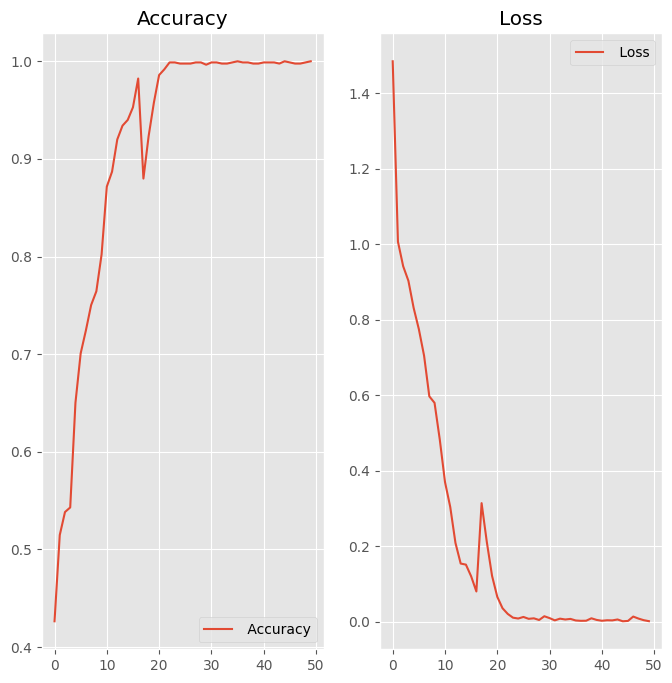

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label=' Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label=' Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

In [ ]:
class_names = ["Bengin cases", "Malignant cases", "Normal cases"]

In [ ]:
# use the saved model to make predictions
from tensorflow.keras import preprocessing
from tensorflow.keras.models import load_model

model = load_model(os.path.join(BASE_PATH, 'lung_cancer_detection_model.h5'))

# load the image
image_path = os.path.join(BASE_PATH, "dataset/Test/Benign cases/Bengin case (114).jpg")
image = preprocessing.image.load_img(image_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
image_array = preprocessing.image.img_to_array(image)
scaled_img = np.expand_dims(image_array, axis=0)

# make predictions on the image
pred = model.predict(scaled_img)

# print the prediction
output = class_names[np.argmax(pred)]
output

1/1 [==============================] - 0s 113ms/step


'Bengin cases'

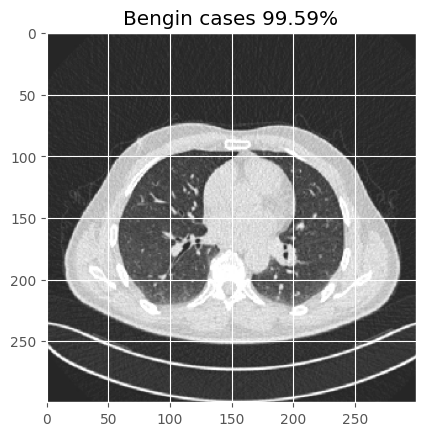

In [ ]:
plt.imshow(image)
plt.title(output + " " + str(round(np.max(pred)*100, 2)) + "%")
plt.show()